In [1]:

#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

import os
import matplotlib.pyplot as plt
import numpy as np



In [12]:

#------------------------------------------------------------------------------
#------------------------------------------------------------------------------

f_pred = 'models/nn_pred_acc94_evts10000_12700-127-2.npy'
f_hist = 'models/nn_hist_acc94_evts10000_12700-127-2.npy'

arrHist = np.load(f_hist)
sArr = np.load(f0)#['arr_0']
#sArr = sArr[0:200]

x_true, y_true = sArr['x_true'], sArr['y_true']
x_reco, y_reco = sArr['x_reco'], sArr['y_reco']
x_pred, y_pred = sArr['x_pred'], sArr['y_pred']


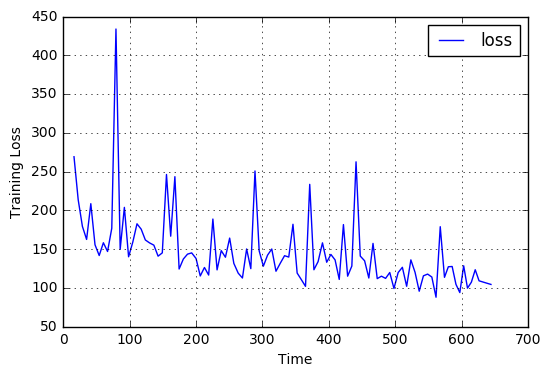

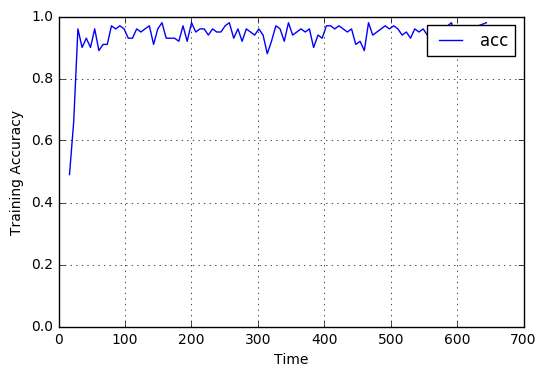

In [34]:

#------------------------------------------------------------------------------
# Training / Validation History
#------------------------------------------------------------------------------

plt.figure()
plt.plot(arrHist[:,2], arrHist[:,0], label='loss')
plt.xlabel('Time')
plt.ylabel('Training Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(arrHist[:,2], arrHist[:,1], label='acc')
plt.xlabel('Time')
plt.ylabel('Training Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.grid()



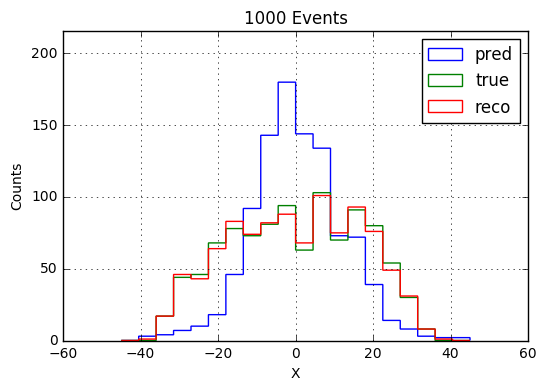

In [48]:

#------------------------------------------------------------------------------
# Position
#------------------------------------------------------------------------------


plt.hist(x_pred, bins=20, range=[-45, 45], label='pred', histtype='step')
plt.hist(x_true, bins=20, range=[-45, 45], label='true', histtype='step')
plt.hist(x_reco, bins=20, range=[-45, 45], label='reco', histtype='step')
plt.xlabel("X")
plt.ylabel("Counts")
plt.title("{0} Events".format(sArr.size))
plt.ylim([0, 1.2*plt.gca().get_ylim()[1]])
plt.legend()
plt.grid()


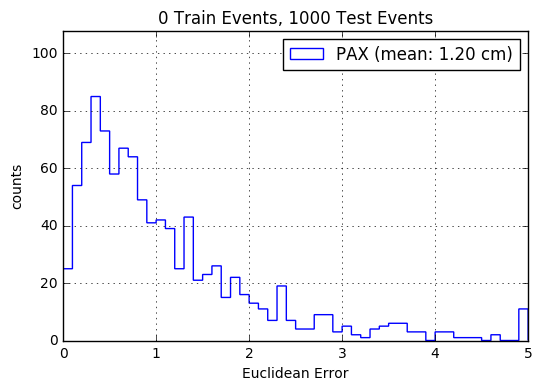

In [50]:

#------------------------------------------------------------------------------
# Euclidean Error
#------------------------------------------------------------------------------

dx_s2   = x_true - x_reco
dy_s2   = y_true - y_reco
dx_pred = x_true - x_pred
dy_pred = y_true - y_pred

dr2_s2        = np.sqrt(dx_s2**2   + dy_s2**2) 
dr2_pred      = np.sqrt(dx_pred**2 + dy_pred**2) 
dr2_s2_mean   = np.mean(dr2_s2)
dr2_pred_mean = np.mean(dr2_pred)


#------------------------------------------------------------------------------
# Plot Error
#------------------------------------------------------------------------------

xmax=5

lbl_s2   = "PAX (mean: {0:.2f} cm)".format(dr2_s2_mean)
lbl_pred = "NN  (mean: {0:.2f} cm)".format(dr2_pred_mean)

plt.hist(np.clip(dr2_s2  , 0, xmax), bins=50, range=[0, xmax], histtype='step', label=lbl_s2)
#plt.hist(np.clip(dr2_pred, 0, xmax), bins=50, range=[0, xmax], histtype='step', label=lbl_pred)

plt.xlabel("Euclidean Error")
plt.ylabel("counts")
plt.title("{0} Train Events, {1} Test Events".format(0, arr.shape[0]))
plt.ylim([0, plt.gca().get_ylim()[1]*1.2])
plt.legend()
plt.grid()

